In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

## Import dataset

In [3]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [4]:
X = titanic_train

In [5]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill in null values for test set

In [6]:
Xtest = titanic_test
Xtest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
Xtest['Age'].fillna(Xtest['Age'].median(),inplace = True)
Xtest['Fare'].fillna(Xtest['Fare'].median(),inplace = True)

In [8]:
Xtest['fare_class'] = Xtest['Fare']/Xtest['Pclass']
Xtest['Family'] = Xtest['Parch'] + Xtest['SibSp']

In [9]:
Xtest.drop(columns=['Cabin'],inplace=True)

## Check for null values

In [10]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Drop null values

In [11]:
X.dropna(subset=['Age'],inplace=True)
# X['Age'].fillna(X_train['Age'].median(),inplace=True)
X.dropna(subset=['Embarked'],inplace=True)
print(X['Age'].isnull().sum())
print(X['Age'].isnull().sum())

0
0


In [12]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [13]:
X.drop(columns=['Cabin'],inplace=True)

In [14]:
X.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Check count of data

In [15]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [16]:
X.drop(columns = ['Name','Ticket'],inplace = True)

In [17]:
id_pass = Xtest['PassengerId']

In [18]:
# X.info()
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Use seaborn sns heatmap

<AxesSubplot:>

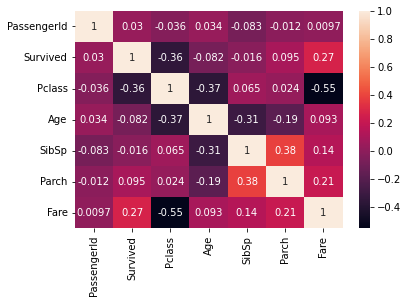

In [19]:
sns.heatmap(X.corr(),annot = True)

## Seaborn pairplot

In [20]:
# sns.pairplot(X)

## Head of dataframe

In [21]:
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Feature Engineering

### Combine the Pclass and fare 

In [22]:
X['Pclass'].unique()

array([3, 1, 2])

In [23]:
X['fare_class'] = X['Fare']/X['Pclass']

In [24]:
# X.drop(columns=['Pclass','Fare'],inplace=True)
# X_val.drop(columns=['Pclass','Fare'],inplace=True)

### Combine Parch and sibsp

In [25]:
X['Family'] = X['Parch'] + X['SibSp']

In [26]:
# X.drop(columns=['Parch','SibSp'],inplace=True)

<AxesSubplot:>

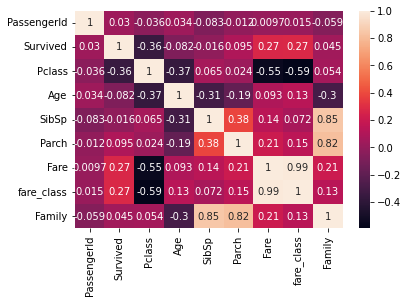

In [27]:
sns.heatmap(X.corr(),annot = True)

## Encode the embarked and Sex label

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])
Xtest['Sex'] = encoder.fit_transform(Xtest['Sex'])
Xtest['Embarked'] = encoder.fit_transform(Xtest['Embarked'])

In [30]:
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare_class,Family
0,1,0,3,1,22.0,1,0,7.2500,2,2.416667,1
1,2,1,1,0,38.0,1,0,71.2833,0,71.283300,1
2,3,1,3,0,26.0,0,0,7.9250,2,2.641667,0
3,4,1,1,0,35.0,1,0,53.1000,2,53.100000,1
4,5,0,3,1,35.0,0,0,8.0500,2,2.683333,0


In [31]:
X_copy = X.copy()
X_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare_class,Family
0,1,0,3,1,22.0,1,0,7.2500,2,2.416667,1
1,2,1,1,0,38.0,1,0,71.2833,0,71.283300,1
2,3,1,3,0,26.0,0,0,7.9250,2,2.641667,0
3,4,1,1,0,35.0,1,0,53.1000,2,53.100000,1
4,5,0,3,1,35.0,0,0,8.0500,2,2.683333,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1,9.708333,5
886,887,0,2,1,27.0,0,0,13.0000,2,6.500000,0
887,888,1,1,0,19.0,0,0,30.0000,2,30.000000,0
889,890,1,1,1,26.0,0,0,30.0000,0,30.000000,0


## Check correlation with encodings

<AxesSubplot:>

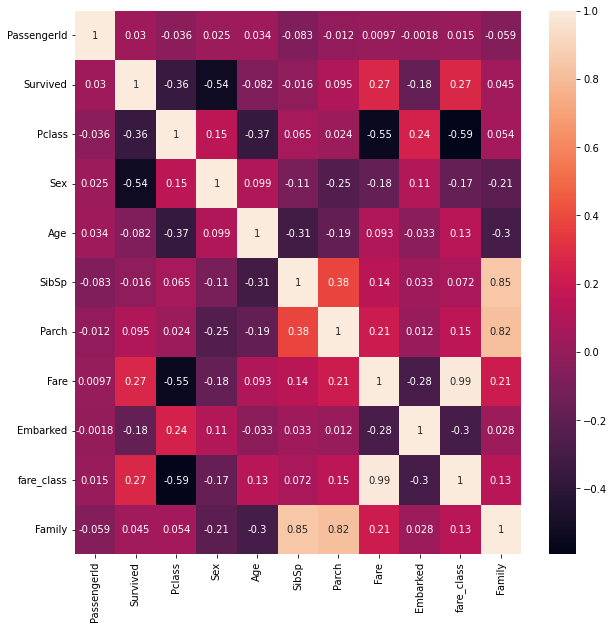

In [32]:
plt.figure(figsize=[10,10])
sns.heatmap(X.corr(),annot=True)

## Split the data

In [33]:
features = ['Sex',"Family"]

In [34]:
y = X['Survived']
X = X[features]

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

## Define Features

# K Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [37]:
TrainX = np.array(X_train[features])
EvalX = np.array(X_val[features])

## Squareroot of count

In [38]:
from sklearn.metrics import accuracy_score
import random

In [39]:
n = TrainX.shape[0]

In [40]:
neighbors = []
for i in range(0,10):
    neighbors.append(random.randrange(5,150,2))

In [41]:
knn_scores = []

In [42]:
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i,weights="distance")
    knn.fit(TrainX,y_train)
    y_predict_knn = knn.predict(EvalX)
    knn_scores.append(accuracy_score(y_val,y_predict_knn))   

In [43]:
knn_scores = np.array(knn_scores)
neighbors = np.array(neighbors)

In [44]:
df_knn = pd.DataFrame({"# Of Neighbors":neighbors,"Accuracy":knn_scores})
df_knn

,# Of Neighbors,Accuracy
0,21,0.765957
1,149,0.765957
2,149,0.765957
3,33,0.765957
4,83,0.765957
5,105,0.765957
6,67,0.765957
7,105,0.765957
8,11,0.765957
9,11,0.765957


In [45]:
#10-fold cross validation, notice that I am giving X,y not X_train, y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
mean_score = np.mean(scores)
scores

array([0.79166667, 0.79166667, 0.8028169 , 0.8028169 , 0.76056338,
       0.77464789, 0.81690141, 0.74647887, 0.78873239, 0.8028169 ])

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier(criterion="gini",max_depth= 3)

In [48]:
tree.fit(TrainX,y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
y_predict = tree.predict(EvalX)

In [50]:
#10-fold cross validation, notice that I am giving X,y not X_train, y_train
scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
mean_score = np.mean(scores)
std_score = np.std(scores)
print(mean_score)
print(std_score)

0.7921361502347418
0.01753664102875097


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
randomstate = 42

In [53]:
forest = RandomForestClassifier(n_estimators= 100,max_depth=4,random_state=randomstate,criterion="gini")

In [54]:
forest.fit(TrainX,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [55]:
#10-fold cross validation, notice that I am giving X,y not X_train, y_train
scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
mean_score = np.mean(scores)
std_score = np.std(scores)
print(mean_score)
print(std_score)

0.7907276995305165
0.022218777973734845


In [56]:
accuracy_score(y_true=y_val,y_pred=forest.predict(EvalX))

0.7659574468085106

## Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
model = keras.Sequential([
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(50,activation = 'selu'),
    keras.layers.Dense(1,activation ='sigmoid')
])

model.compile(
    optimizer = 'adamax',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs = 15)

Epoch 1/15
15/15 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.4990
Epoch 2/15
15/15 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6038
Epoch 3/15
15/15 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.6038
Epoch 4/15
15/15 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.6604
Epoch 5/15
15/15 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7191
Epoch 6/15
15/15 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7904
Epoch 7/15
15/15 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7945
Epoch 8/15
15/15 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7966
Epoch 9/15
15/15 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7987
Epoch 10/15
15/15 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7966
Epoch 11/15
15/15 [

## Using GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
features = ['Sex',"Pclass","Embarked","Fare"]

In [ ]:
y = X_copy["Survived"]
X = X_copy[features]

In [ ]:
clf = RandomizedSearchCV(RandomForestClassifier(),{
    "n_estimators": [80,90,100,110,150,55,120],
    "criterion":["gini","entropy"],
    "max_depth":[2,3,4,5,6,7,8],
    "max_features":["auto", "sqrt", "log2"]
},cv = 5,return_train_score=False,n_iter=5)
clf.fit(X,y)
print(clf.best_score_,clf.best_params_)

In [ ]:
clf_2 = RandomizedSearchCV(SVC(gamma = "auto"),{
    "C": [1,10,20,30,40],
    "kernel":['linear', 'rbf'],
},cv = 5,return_train_score=False,n_iter=2)
clf_2.fit(X,y)
print(clf_2.best_score_,clf_2.best_params_)

## Apply models to test data

In [ ]:
Xtest = Xtest[features]

In [ ]:
y_predict = forest.predict(np.array(Xtest))

# Create dataframe for submission

In [ ]:
df = pd.DataFrame({"PassengerId":id_pass ,"Survived":y_predict})
df.to_csv('March15_sub_Titanic.csv',index =False)
df